In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd /content/drive/MyDrive/Bike-Sharing-Dataset

/content/drive/MyDrive/Bike-Sharing-Dataset


we will dig deeper into the data and apply various machine learning regression techniques like Decision Trees, Random Forest and Ada boost regressor. We will find the best hyperparameters by parameter tuning using GridSearchCV for every regressor algorithm.


After analysing errors of each model, We will select a model which gives us the least Root Mean Squared Log Error(RMSLE) score and build a model using it.

**Importing necessary libraries**

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import pylab
import calendar
%matplotlib inline
import missingno as msno
from datetime import datetime

**Day**

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Bike-Sharing-Dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Understanding the data**

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

# Data Preprocessing



In [17]:
#Creating a tempDate column
df['tempDate'] = df.dteday.apply(lambda x:x.split())

In [18]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,[01-01-2011]
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,[02-01-2011]
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,[03-01-2011]
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,[04-01-2011]
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,[05-01-2011]


In [19]:
#splitting the tempDate column into year ,month ,day and finding the weekday
df['year'] = df.tempDate.apply(lambda x:x[0].split('-')[2])
df['month'] = df.tempDate.apply(lambda x:x[0].split('-')[1])
df['day'] = df.tempDate.apply(lambda x:x[0].split('-')[0])
df['weekday'] = df.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%d-%m-%Y").weekday()])

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,tempDate,year,month,day
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,[01-01-2011],2011,01,01
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,[02-01-2011],2011,01,02
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,[03-01-2011],2011,01,03
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,[04-01-2011],2011,01,04
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,[05-01-2011],2011,01,05


*Dropping redundant columns*

In [20]:
df = df.drop('tempDate',axis=1) 
df = df.drop('dteday',axis=1)
df = df.drop('instant',axis=1)

**Missing vakue analysis**

In [21]:
df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64

In [22]:
#summary statistics about the dataframe such as the mean, maximum and minimum values. 
#At the top of the table is a row called counts
df.describe()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [23]:
#we have a more concise summary of the state of the data and the extent of data missingness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
 14  year        731 non-null    object 
 15  month       731 non-null    object 
 16  day         731 non-null    object 
dtypes: float64(4), int64(9), object(4)
memory usage: 97.2+ KB


In [24]:
df['year']=df['year'].astype('str').astype(int);
df['month']=df['month'].astype('str').astype(int);
df['day']=df['day'].astype('str').astype(int);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
 14  year        731 non-null    int64  
 15  month       731 non-null    int64  
 16  day         731 non-null    int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 97.2+ KB


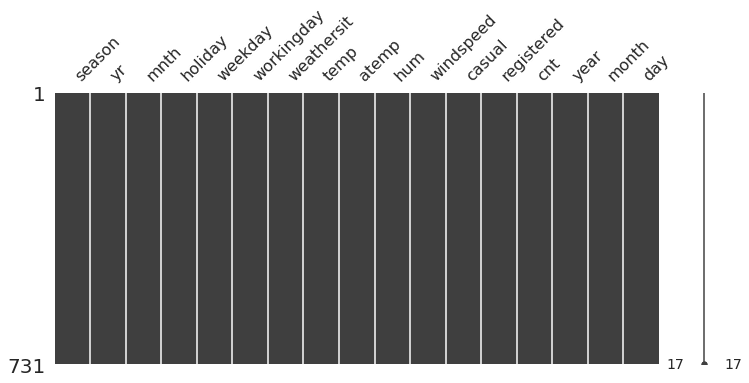

In [26]:

msno.matrix(df,figsize=(12,5))

# **Exploratory Data Analytics**

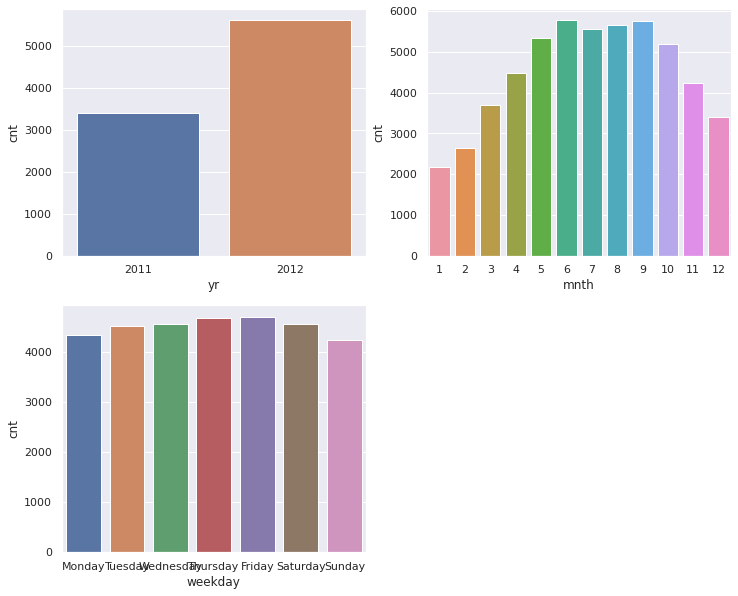

In [27]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
my_labels =['2011','2012']
ax1 = sns.barplot(x='yr',y='cnt',data=df.groupby('yr')['cnt'].mean().reset_index())
ax1.set_xticks([0,1])
ax1.set_xticklabels(['2011','2012'])
#month count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='mnth',y='cnt',data=df.groupby('mnth')['cnt'].mean().reset_index())

#day countS
indexes=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='weekday',y='cnt',data=df.groupby('weekday')['cnt'].mean().reindex(indexes).reset_index())

[Text(0, 0, 'Clear'), Text(0, 0, 'Mist'), Text(0, 0, 'Snow')]

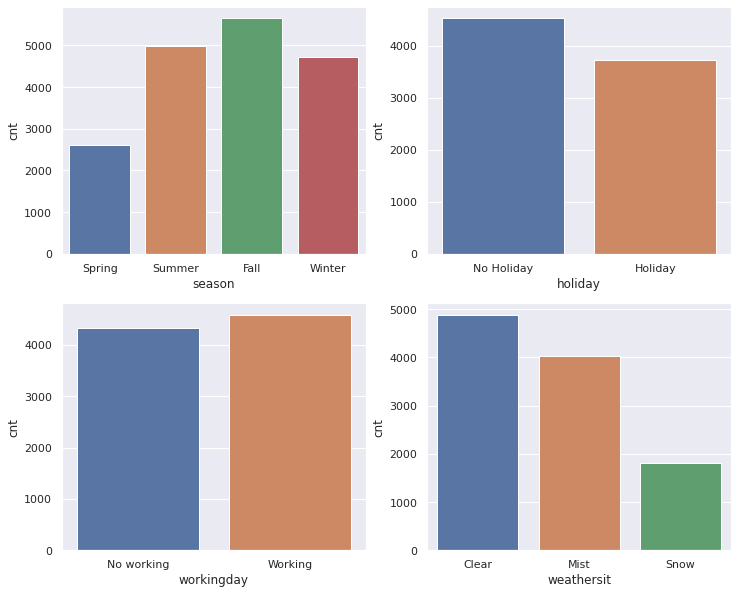

In [28]:
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='cnt',data=df.groupby('season')['cnt'].mean().reset_index())
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(['Spring','Summer','Fall','Winter'])

#holiday based count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='cnt',data=df.groupby('holiday')['cnt'].mean().reset_index())
ax2.set_xticks([0,1])
ax2.set_xticklabels(['No Holiday','Holiday'])
#working day based count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='cnt',data=df.groupby('workingday')['cnt'].mean().reset_index())
ax3.set_xticks([0,1])
ax3.set_xticklabels(['No working','Working'])
#weather situation based count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weathersit',y='cnt',data=df.groupby('weathersit')['cnt'].mean().reset_index())
ax4.set_xticks([0,1,2])
ax4.set_xticklabels(['Clear','Mist','Snow'])

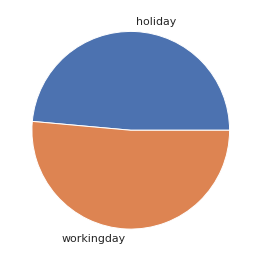

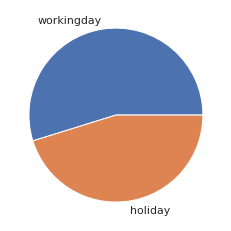

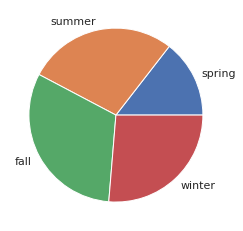

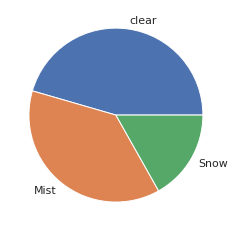

In [29]:
#workingday based count
data=df.groupby('workingday')['cnt'].mean()
mylabels = ['holiday','workingday']
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.pie(data, labels = mylabels)
plt.show()

#holiday based count
data=df.groupby('holiday')['cnt'].mean()
mylabels = ['workingday','holiday']
ax2 = fig.add_subplot(2,2,2)
ax2 = plt.pie(data, labels = mylabels)
plt.show()

#season based count
data=df.groupby('season')['cnt'].mean()
mylabels = ['spring','summer','fall','winter']
ax3 = fig.add_subplot(2,2,3)
ax3 = plt.pie(data, labels = mylabels)
plt.show()

#weatherlist based count
data=df.groupby('weathersit')['cnt'].mean()
mylabels = ['clear','Mist','Snow']
ax4 = fig.add_subplot(2,2,4)
ax4 = plt.pie(data, labels = mylabels)

plt.show()

**Outlier detection**

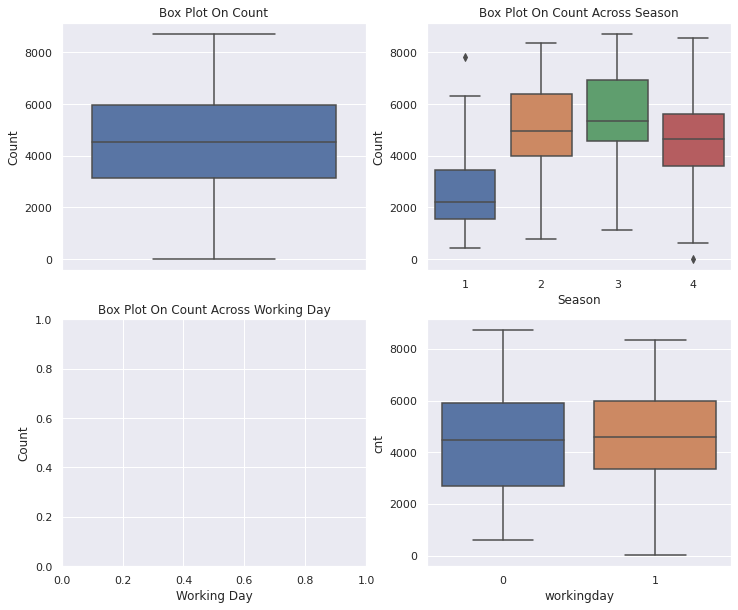

In [30]:
#outliers detection
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[0][1])
#sns.boxplot(data=X_train,y="cnt",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
#axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][0].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
plt.show()

In [31]:
trainWithtoutOutlier = df[np.abs(df["cnt"]-df["cnt"].mean()) <=(3*df["cnt"].std())]
trainWithtoutOutlier = df[np.abs(df["season"]-df["season"].mean()) <=(3*df["season"].std())]
trainWithtoutOutlier = df[np.abs(df["workingday"]-df["workingday"].mean()) <=(3*df["workingday"].std())]

In [32]:
print ("Shape Of The Before Ouliers: ",df.shape)
print ("Shape Of The After Ouliers: ",trainWithtoutOutlier.shape)

Shape Of The Before Ouliers:  (731, 17)
Shape Of The After Ouliers:  (731, 17)


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

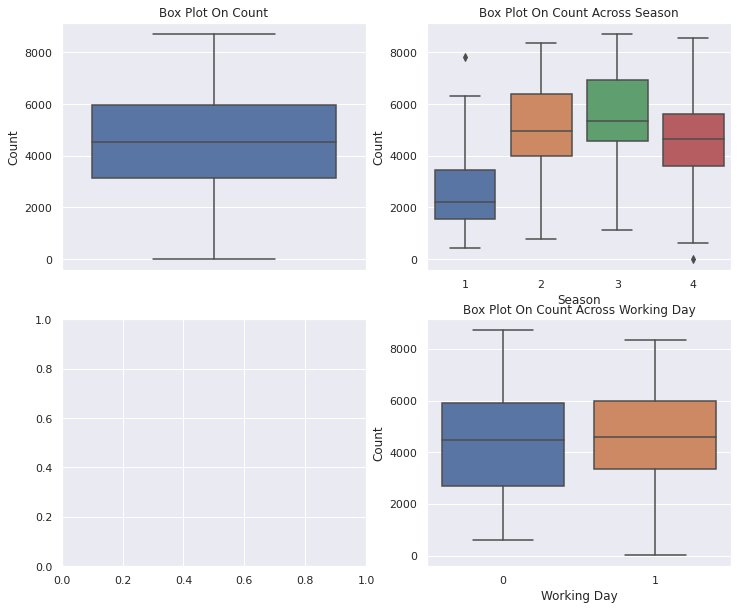

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=trainWithtoutOutlier,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="season",orient="v",ax=axes[0][1])
#sns.boxplot(data=trainWithtoutOutlier,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=trainWithtoutOutlier,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
#axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

*Correlation Analysis*

In [34]:
df.corr()

,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
season,1.000000,-0.001844,0.831440,-0.010537,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100,-0.001844,0.831440,-0.000861
yr,-0.001844,1.000000,-0.001792,0.007954,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710,1.000000,-0.001792,0.002061
mnth,0.831440,-0.001792,1.000000,0.019191,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977,-0.001792,1.000000,0.009157
holiday,-0.010537,0.007954,0.019191,1.000000,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348,0.007954,0.019191,-0.010710
workingday,0.012485,-0.002013,-0.005901,-0.253023,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156,-0.002013,-0.005901,0.009907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391,-0.048727,0.043528,-0.023824
temp,0.334315,0.047604,0.220205,-0.028556,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494,0.047604,0.220205,0.024253
atemp,0.342876,0.046106,0.227459,-0.032507,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066,0.046106,0.227459,0.018286
hum,0.205445,-0.110651,0.222204,-0.015937,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659,-0.110651,0.222204,0.042753
windspeed,-0.229046,-0.011817,-0.207502,0.006292,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545,-0.011817,-0.207502,0.021588


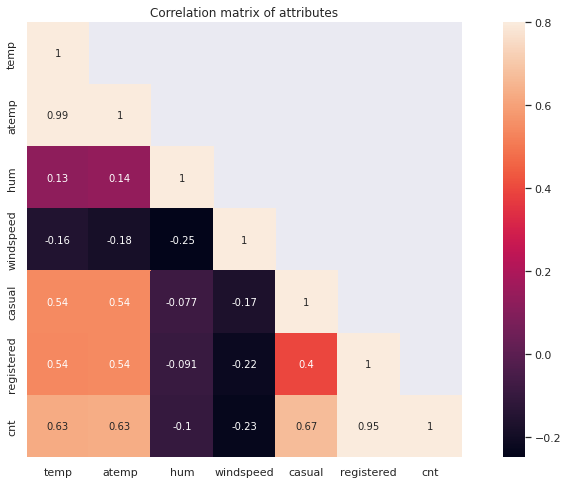

In [35]:
#Create the correlation matrix
correMtr=df[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In [36]:
# Dropping season column as it is highly correlated to‘mnth’ column
df.drop('season',axis=1,inplace=True) 
# Dropping atemp column as it is highly correlated to ‘temp’ column
df = df.drop('atemp',axis=1) 

In [37]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year,month,day
0,0,1,0,Saturday,0,2,0.344167,0.805833,0.160446,331,654,985,2011,1,1
1,0,1,0,Sunday,0,2,0.363478,0.696087,0.248539,131,670,801,2011,1,2
2,0,1,0,Monday,1,1,0.196364,0.437273,0.248309,120,1229,1349,2011,1,3
3,0,1,0,Tuesday,1,1,0.200000,0.590435,0.160296,108,1454,1562,2011,1,4
4,0,1,0,Wednesday,1,1,0.226957,0.436957,0.186900,82,1518,1600,2011,1,5


In [38]:
#Replacing categorical variables with actual values in weathersit
df['weathersit'] = df['weathersit'].replace({1:'springer',2:'summer',3:'fall',4:'winter'})


In [39]:
# One hot encoding on categorical columns.
df=pd.get_dummies(df,columns=['weathersit','weekday'],drop_first=True)

In [40]:
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,month,day,weathersit_springer,weathersit_summer,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,1,0,0,0.344167,0.805833,0.160446,331,654,985,...,1,1,0,1,0,1,0,0,0,0
1,0,1,0,0,0.363478,0.696087,0.248539,131,670,801,...,1,2,0,1,0,0,1,0,0,0
2,0,1,0,1,0.196364,0.437273,0.248309,120,1229,1349,...,1,3,1,0,1,0,0,0,0,0
3,0,1,0,1,0.200000,0.590435,0.160296,108,1454,1562,...,1,4,1,0,0,0,0,0,1,0
4,0,1,0,1,0.226957,0.436957,0.186900,82,1518,1600,...,1,5,1,0,0,0,0,0,0,1


In [41]:
# Median imputation
for i in df.columns:
  df[i].fillna(value = df[i].median())

I have segregated the data based on ‘workingday’ column as the demand changes significantly on a working day when compared to a non-working day.
I have built two models one to predict ‘casual’ and the other to predict ‘registered’. The predicted ‘count’ is the sum of predicted ‘casual’ and predicted ‘registered’. Here, I am only showing the code to predict ‘registered’ on a working day. Same techniques can be applied to predict ‘casual’ on a working day and ‘casual’, ‘registered’ on a non-working day. You can check the whole code in the end.


In [42]:
# Segregating data based on ‘workingday’ column
work_day = df[df['workingday']==1] 
non_work_day = df[df['workingday']==0]
# Model for registered
x = work_day.drop(['casual','registered','cnt'],axis = 1)
y = work_day.registered
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)



Linear Regression is used as a base model here despite knowing that Linear Regression wouldn’t work here. We fit the model to use ‘mean_squared_log_error’ of this model as a reference to check how good the other models are performing.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   731 non-null    int64  
 1   mnth                 731 non-null    int64  
 2   holiday              731 non-null    int64  
 3   workingday           731 non-null    int64  
 4   temp                 731 non-null    float64
 5   hum                  731 non-null    float64
 6   windspeed            731 non-null    float64
 7   casual               731 non-null    int64  
 8   registered           731 non-null    int64  
 9   cnt                  731 non-null    int64  
 10  year                 731 non-null    int64  
 11  month                731 non-null    int64  
 12  day                  731 non-null    int64  
 13  weathersit_springer  731 non-null    uint8  
 14  weathersit_summer    731 non-null    uint8  
 15  weekday_Monday       731 non-null    uin

In [44]:
#Removing unwanted columns
#df.drop('weathersit_summer',axis=1,inplace=True) 
#df.drop('weekday_Sunday',axis=1,inplace=True) 

In [45]:

from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x,y)
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print(r2)

MSE for the data: 486572.45860521146
RMLSE for the data: 0.47603905763553384
0.7644250957567758


In [47]:
import pickle 
pickle_out = open("model1", mode = "wb") 
pickle.dump(model1, pickle_out) 
pickle_out.close()

In [46]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=10)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_


In [ ]:
# Fitting the model with best params
ab_rf = AdaBoostRegressor(base_estimator=RF,n_estimators=c['n_estimators'],random_state=0)
model = ab_rf.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For Ada-Boost
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Segregating data based on ‘workingday’ column
work_day = df[df['workingday']==1] 
non_work_day = df[df['workingday']==0]
# Model for registered
x = work_day.drop(['casual','registered','cnt'],axis = 1)
y = work_day.casual
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x,y)
y_pred = result.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Finding best parameters for decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt_params = {'max_depth':np.arange(1,50,1),'min_samples_leaf':np.arange(2,15)}
from sklearn.model_selection import GridSearchCV
gs_dt = GridSearchCV(dt,dt_params,cv=10)
gs_dt.fit(x_train,y_train)
a = gs_dt.best_params_

In [ ]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=a['max_depth'],min_samples_leaf= a['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Finding best parameters for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':np.arange(25,150,25),'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,15,3)}

from sklearn.model_selection import GridSearchCV
gs_rf = GridSearchCV(rf,rf_params,cv=10)
gs_rf.fit(x_train,y_train)
b = gs_rf.best_params_

In [ ]:
# Fitting the model with best params
RF = RandomForestRegressor(n_estimators=b['n_estimators'],max_depth=b['max_depth'],min_samples_leaf=b['min_samples_leaf'],random_state=0)
model = RF.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest
r2 = r2_score(y_pred,y_test)
print(r2)

In [ ]:
# Finding best parameters for AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor(base_estimator=RF,random_state=0)
ar_params = {'n_estimators':np.arange(25,200,25)}
from sklearn.model_selection import GridSearchCV
gs_ar = GridSearchCV(ar,ar_params,cv=10)
gs_ar.fit(x_train,y_train)
c = gs_ar.best_params_

Cnt 

In [ ]:
# Segregating data based on ‘workingday’ column
work_day = df[df['workingday']==1] 
non_work_day = df[df['workingday']==0]
# Model for registered
x = work_day.drop(['casual','registered','cnt'],axis = 1)
y = work_day.cnt
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state = 2)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
result = model1.fit(x,y)
y_pred = result.predict(x_test)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_test)
print('MSE for the data:',mse)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree
from sklearn.metrics import r2_score
r2 = r2_score(y_pred,y_test)
print(r2)